In [1]:
import neurokit2 as nk
import matplotlib.pyplot as plt
import pyedflib
import numpy as np

c:\Users\duart\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
C:\Users\duart\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


## Get data

In [212]:
# Load the .edf file
file_path = '../datasetsPart2/valu3s/vitaport/fp01_2.edf'
f = pyedflib.EdfReader(file_path)

# Get the list of signal labels
signal_labels = f.getSignalLabels()
print(f"Signal labels: {signal_labels}")

Signal labels: ['EOG_v', 'EOG_h', 'ECG', 'Marker', 'Bat']


## Extract the ECG signal

In [213]:
# Extract the ECG signal (assuming 'ECG' is the label)
ecg_signal_index = signal_labels.index('ECG')
ecg_signal = f.readSignal(ecg_signal_index)

# Close the EDF file
f.close()

## Process ECG and find peaks

In [214]:
# Process the ECG signal to find peaks
signals, info = nk.ecg_process(ecg_signal, sampling_rate=f.getSampleFrequency(ecg_signal_index))

In [215]:
# Extract peaks
peaks = info['ECG_R_Peaks']

## Time Domain

### Estract Features

,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,HRV_SDSD,...,HRV_IQRNN,HRV_SDRMSSD,HRV_Prc20NN,HRV_Prc80NN,HRV_pNN50,HRV_pNN20,HRV_MinNN,HRV_MaxNN,HRV_HTI,HRV_TINN
0,713.319106,24.570761,11.148157,21.256995,9.33931,22.083916,6.336768,22.602254,12.836889,12.838027,...,31.25,1.914074,695.3125,734.375,0.106496,8.732694,617.1875,816.40625,7.562416,0.0


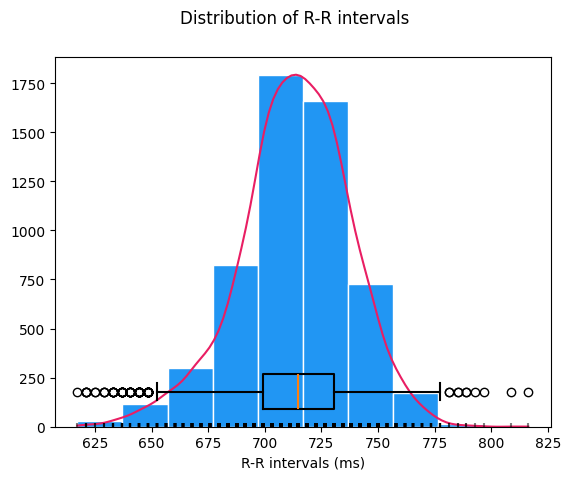

In [216]:
# Extract clean EDA and SCR features
hrv_time = nk.hrv_time(signals, sampling_rate=f.getSampleFrequency(ecg_signal_index), show=True)
hrv_time

## Frequency Domain
### Estract Features

,HRV_ULF,HRV_VLF,HRV_LF,HRV_HF,HRV_VHF,HRV_TP,HRV_LFHF,HRV_LFn,HRV_HFn,HRV_LnHF
0,0.000418,0.009323,0.007121,0.00173,0.000143,0.018734,4.117083,0.380095,0.092322,-6.35987


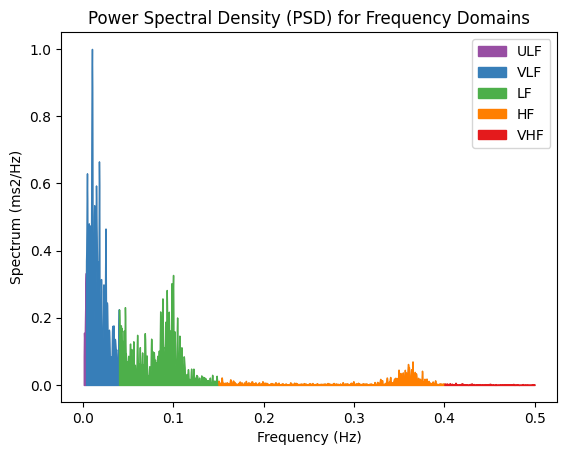

In [224]:
# Extract the frequency domain features
hrv_freq = nk.hrv_frequency(signals, sampling_rate=f.getSampleFrequency(ecg_signal_index), show=True, normalize=True)
hrv_freq

## All Domains
### Extract Features

,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,HRV_SDSD,...,HRV_SampEn,HRV_ShanEn,HRV_FuzzyEn,HRV_MSEn,HRV_CMSEn,HRV_RCMSEn,HRV_CD,HRV_HFD,HRV_KFD,HRV_LZC
0,713.319106,24.570761,11.148157,21.256995,9.33931,22.083916,6.336768,22.602254,12.836889,12.838027,...,1.310341,4.672802,0.963644,0.859118,1.453847,1.869159,1.455222,1.619004,3.357321,0.619238


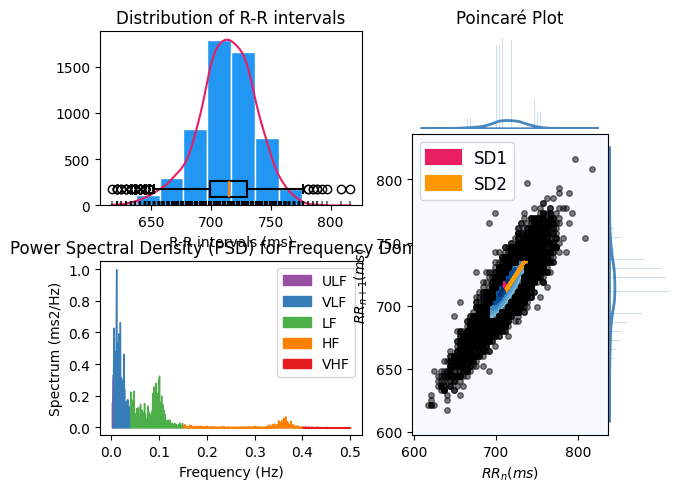

In [225]:
# Extract all domains features
hrv_indices = nk.hrv(signals, sampling_rate=f.getSampleFrequency(ecg_signal_index), show=True)
hrv_indices